  site_id  sensor_value
0  Site_A     225450.53
1  Site_B     220911.02


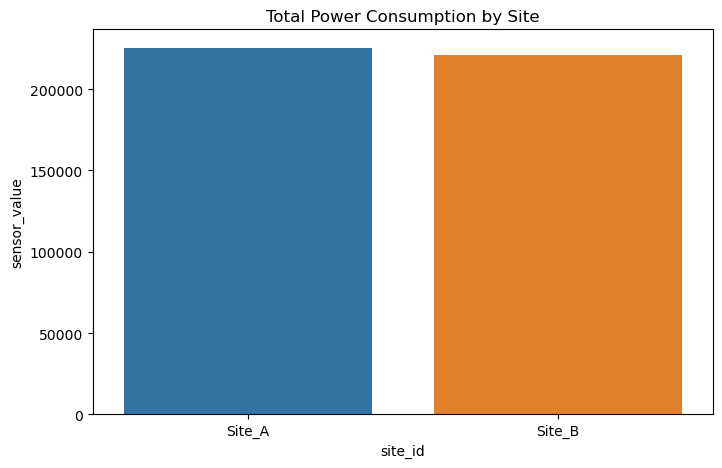

  site_id                hour  sensor_value
0  Site_A 2023-12-01 00:00:00        842.55
1  Site_A 2023-12-01 01:00:00        749.54
2  Site_A 2023-12-01 02:00:00        604.60
3  Site_A 2023-12-01 03:00:00        761.08
4  Site_A 2023-12-01 04:00:00        740.55


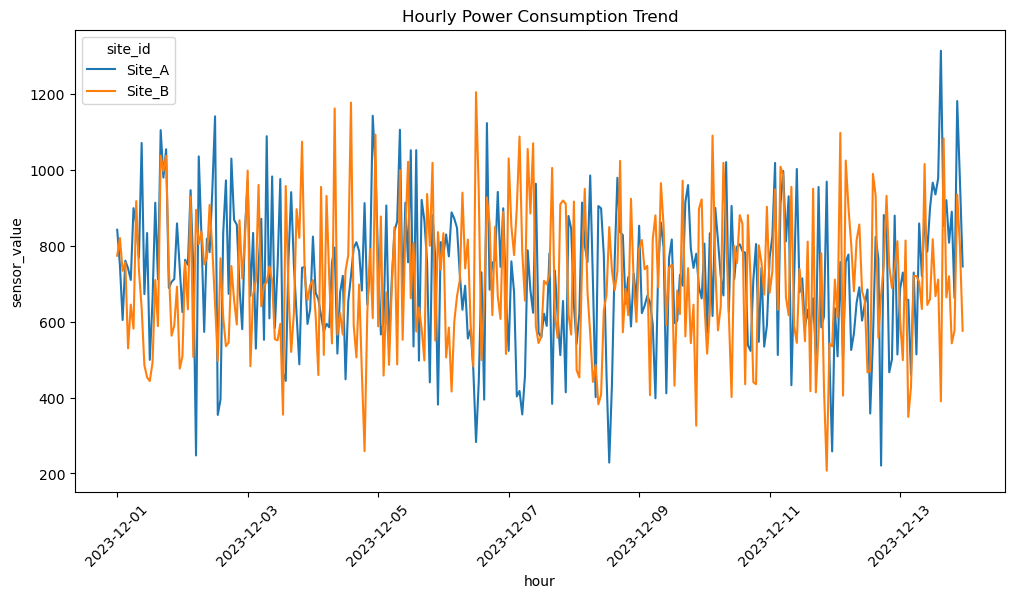

       sensor_value
0             67.53
18725         77.29
7490          61.18
18726         56.34
7491          66.65


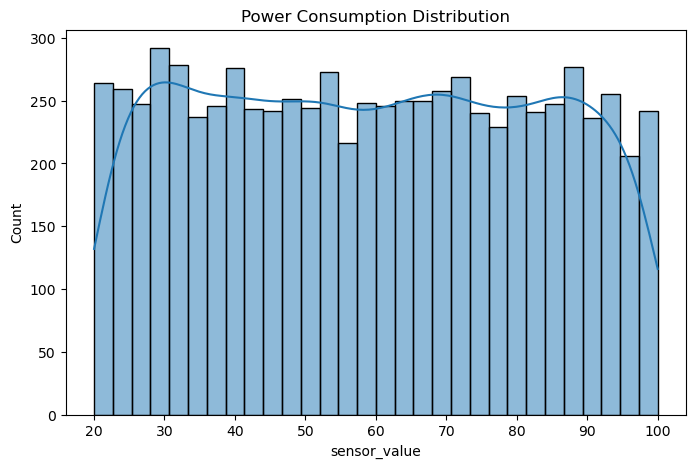

sensor_name        humidity  power_consumption  temperature
sensor_name                                                
humidity           1.000000          -0.003364    -0.010319
power_consumption -0.003364           1.000000    -0.013824
temperature       -0.010319          -0.013824     1.000000


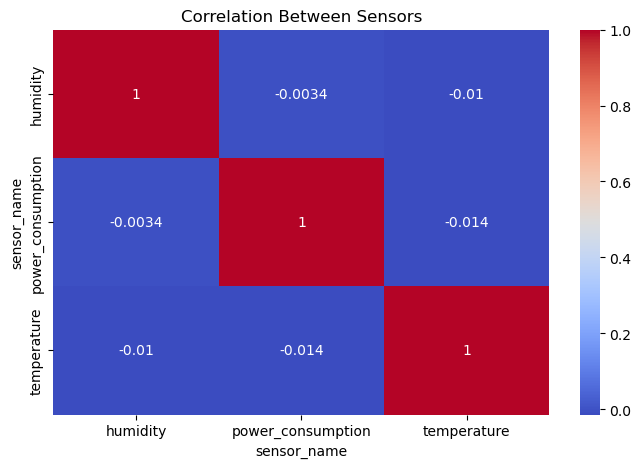

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data_path = "IoT_Sensor_Data (1).csv"
df = pd.read_csv(data_path)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')

# Total power consumption by site
total_power_df = df[df['sensor_name'] == 'power_consumption'].groupby('site_id')['sensor_value'].sum().reset_index()
if total_power_df.empty:
    print("No data available for total power consumption analysis.")
else:
    total_power_df.to_csv("total_power_consumption.csv", index=False)
    print(total_power_df.head())

    plt.figure(figsize=(8, 5))
    sns.barplot(x='site_id', y='sensor_value', data=total_power_df)
    plt.title('Total Power Consumption by Site')
    plt.savefig('total_power_consumption.png')
    plt.show()

# Hourly power consumption trend
df['hour'] = df['timestamp'].dt.floor('H')
hourly_power_df = df[df['sensor_name'] == 'power_consumption'].groupby(['site_id', 'hour'])['sensor_value'].sum().reset_index()
hourly_power_df['hour'] = pd.to_datetime(hourly_power_df['hour'])
hourly_power_df.set_index(['site_id', 'hour'], inplace=True)

# Generate hourly range for each site
all_sites = hourly_power_df.index.get_level_values('site_id').unique()
time_range = pd.date_range(start=hourly_power_df.index.get_level_values('hour').min(),
                           end=hourly_power_df.index.get_level_values('hour').max(), freq='H')

hourly_power_df = hourly_power_df.reindex(pd.MultiIndex.from_product([all_sites, time_range], names=['site_id', 'hour']), fill_value=0)
hourly_power_df.reset_index(inplace=True)

if hourly_power_df.empty:
    print("No data available for hourly trend analysis.")
else:
    hourly_power_df.to_csv("hourly_power_consumption.csv", index=False)
    print(hourly_power_df.head())

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='hour', y='sensor_value', hue='site_id', data=hourly_power_df)
    plt.xticks(rotation=45)
    plt.title('Hourly Power Consumption Trend')
    plt.savefig('hourly_power_consumption.png')
    plt.show()

# Power consumption distribution
power_dist_df = df[df['sensor_name'] == 'power_consumption'][['sensor_value']]
if power_dist_df.empty:
    print("No data available for power distribution analysis.")
else:
    power_dist_df.to_csv("power_distribution.csv", index=False)
    print(power_dist_df.head())

    plt.figure(figsize=(8, 5))
    sns.histplot(power_dist_df['sensor_value'], kde=True, bins=30)
    plt.title('Power Consumption Distribution')
    plt.savefig('power_distribution.png')
    plt.show()

# Correlation analysis between sensor readings
correlation_df = df.pivot_table(index='timestamp', columns='sensor_name', values='sensor_value')
correlation_matrix = correlation_df.corr()
correlation_matrix.to_csv("sensor_correlation.csv")
print(correlation_matrix)

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sensors')
plt.savefig('sensor_correlation.png')
plt.show()

# Advanced Analysis
# Rolling mean for trend visualization
df['rolling_mean'] = df[df['sensor_name'] == 'power_consumption']['sensor_value'].rolling(window=24).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['timestamp'], y=df['rolling_mean'], hue=df['site_id'])
plt.title('24-Hour Rolling Average of Power Consumption')
plt.savefig('rolling_average.png')
plt.show()

# Site-wise boxplot to detect anomalies
plt.figure(figsize=(10, 6))
sns.boxplot(x='site_id', y='sensor_value', data=df[df['sensor_name'] == 'power_consumption'])
plt.title('Power Consumption Distribution by Site')
plt.savefig('power_boxplot.png')
plt.show()

# Sensor performance over time
df['day_of_week'] = df['timestamp'].dt.day_name()
avg_by_day = df[df['sensor_name'] == 'power_consumption'].groupby('day_of_week')['sensor_value'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_by_day.index, y=avg_by_day.values)
plt.title('Average Power Consumption by Day of the Week')
plt.savefig('power_by_day.png')
plt.show()
